In [32]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import matplotlib.pylab as plt


In [33]:
df = pd.read_csv('globalcount_data.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24051 entries, 0 to 24050
Data columns (total 92 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   row_id                                                   24051 non-null  int64  
 1   unique_id                                                24051 non-null  int64  
 2   survey_type                                              24051 non-null  object 
 3   iso3166                                                  24046 non-null  object 
 4   surveydate                                               24051 non-null  object 
 5   city_town                                                24049 non-null  object 
 6   city_town_tr                                             20503 non-null  object 
 7   country_of_residence                                     24050 non-null  object 
 8   gender_not_listed         

In [35]:
analysis = df.iloc[:,58:69]
analysis['country'] = df.loc[:,'country_of_residence']
analysis_long = analysis.melt(id_vars = 'country', var_name = 'issue')


In [36]:
analysis_long.head()

,country,issue,value
0,United Kingdom of Great Britain and Northern I...,issue_city_civil_rights_and_freedoms,0
1,United Kingdom of Great Britain and Northern I...,issue_city_civil_rights_and_freedoms,0
2,Canada,issue_city_civil_rights_and_freedoms,0
3,Switzerland,issue_city_civil_rights_and_freedoms,0
4,Belgium,issue_city_civil_rights_and_freedoms,1


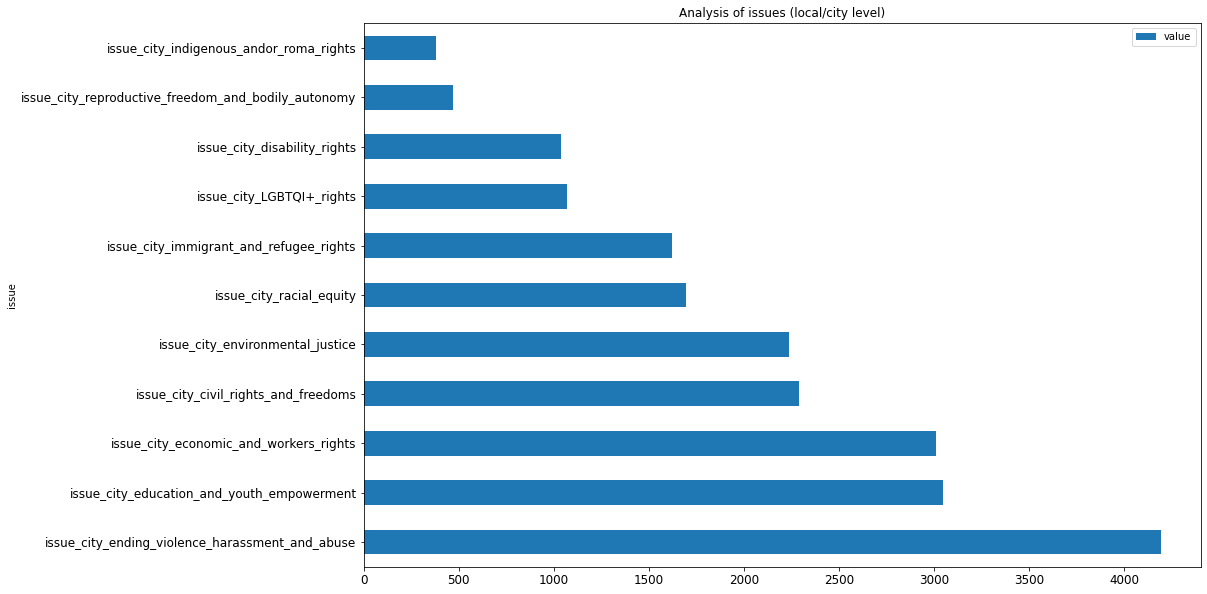

In [37]:
analysis_long.groupby(['issue']).sum().sort_values(by = 'value', ascending = False).plot.barh(title='Analysis of issues (local/city level)', figsize=(15,10), fontsize=12)

In [38]:
tutask =  pd.read_csv('globalcount_data.csv')
tutask

,row_id,unique_id,survey_type,iso3166,surveydate,city_town,city_town_tr,country_of_residence,gender_not_listed,cisgender_man,cisgender_woman,non_conforming_or_non_binary,gender_choose_not_to_identify,man,transgender_man,transgender_woman,woman,racial_identity_not_listed,asian,biracial_or_mixed,black_or_of_african_descent,hispanic_or_latinx,choose_not_to_identify,indigenous,indigenous_central_or_south_american,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white,age,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,...,barrier_person_immigrant_and_refugee_rights,barrier_person_indigenous_andor_roma_rights,barrier_person_LGBTQI+_rights,barrier_racial_equity,barrier_person_reproductive_freedom_and_bodily_autonomy,barrier_person_sexual_reproductive_and_parental_health,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_city_sexual_reproductive_and_parental_health,barrier_city_civil_rights_and_freedoms,barrier_city_disability_rights,barrier_city_economic_and_workers_rights,barrier_city_education_and_youth_empowerment,barrier_city_ending_violence_harassment_and_abuse,barrier_city_environmental_justice,barrier_city_immigrant_and_refugee_rights,barrier_city_indigenous_andor_roma_rights,barrier_city_LGBTQI+_rights,barrier_city_racial_equity,barrier_city_reproductive_freedom_and_bodily_autonomy,barrier_city_sexual_reproductive_and_parental_health,npo_1,npo_2,npo_3,progress_10_years,npo_1_tr,npo_2_tr,npo_3_tr,progress_10_years_tr,language,langauge_score
0,2,12327918977,long,UK,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,1,0,0,0,0,...,Political,NaN,Cultural/Social,NaN,NaN,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,Cultural/Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,12327959040,long,UK,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,0,0,0,1,0,...,NaN,Cultural/Social,Cultural/Social,NaN,NaN,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Economic,NaN,Cultural/Social,NaN,NaN,NaN,Na,na,NaN,NaN,On,on,ON,NaN,pl,1.00
2,4,12340367937,long,CA,1/20/2021 20:22,Waterloo,Waterloo,Canada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,12340336342,long,CH,1/20/2021 20:29,Zuerich,Zuerich,Switzerland,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45 to 54,0,0,1,0,1,0,...,NaN,NaN,NaN,NaN,Cultural/Social,NaN,0,0,1,0,0,0,1,0,0,1,0,0,NaN,NaN,Political,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,NaN,Amnesty International,Frauenstreik Züeich,Schweizerischer Gewerkschaftsbund & VPOD Gewer...,"Gleichstellung und Respekt bei der Arbeit, gle...",Amnesty International,Frauenstreik Züeich,Swiss Trade Union Confederation & VPOD Trade U...,"Equality and respect at work, the same AHV for...",de,0.97
4,6,12340427318,long,BE,1/20/2021 20:47,Brussels,Brussels,Belgium,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35 to 44,0,0,1,0,0,0,...,Political,NaN,Political,NaN,NaN,NaN,1,0,0,0,0,0,1,0,0,1,0,0,Education,NaN,NaN,NaN,NaN,NaN,Political,NaN,NaN,Education,NaN,NaN,SINGA,SINGA,NaN,More women in high political positions. Ac

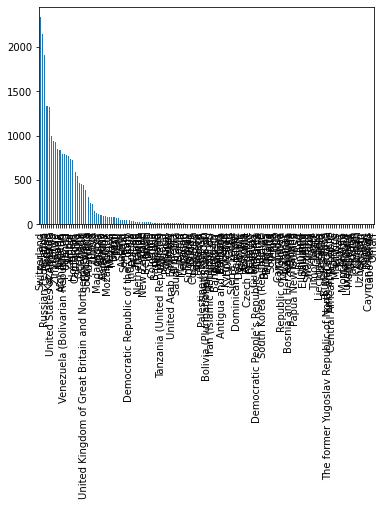

In [39]:
tutask['country_of_residence'].value_counts().plot(kind = 'bar')

In [40]:
tutask.columns

Index(['row_id', 'unique_id', 'survey_type', 'iso3166', 'surveydate',
       'city_town', 'city_town_tr', 'country_of_residence',
       'gender_not_listed', 'cisgender_man', 'cisgender_woman',
       'non_conforming_or_non_binary', 'gender_choose_not_to_identify', 'man',
       'transgender_man', 'transgender_woman', 'woman',
       'racial_identity_not_listed', 'asian', 'biracial_or_mixed',
       'black_or_of_african_descent', 'hispanic_or_latinx',
       'choose_not_to_identify', 'indigenous',
       'indigenous_central_or_south_american', 'middle_eastern',
       'native_american', 'native_hawaiian', 'north_african',
       'pacific_islander', 'south_asian', 'southeast_asian', 'white', 'age',
       'issue_person_civil_rights_and_freedoms',
       'issue_person_disability_rights',
       'issue_person_economic_and_workers_rights',
       'issue_person_education_and_youth_empowerment',
       'issue_person_ending_violence_harassment_and_abuse',
       'issue_person_environmental_ju

Now I select the variables or columns I am interested in 

In [41]:
tutask_subset = tutask[['survey_type', 'country_of_residence',
       'cisgender_man', 'cisgender_woman',
       'non_conforming_or_non_binary',  'man',
       'transgender_man', 'transgender_woman', 'woman',
       'asian', 'biracial_or_mixed',
       'black_or_of_african_descent', 'hispanic_or_latinx',
       'indigenous',
       'indigenous_central_or_south_american', 'middle_eastern',
       'native_american', 'native_hawaiian', 'north_african',
       'pacific_islander', 'south_asian', 'southeast_asian', 'white', 'age',
       'issue_person_civil_rights_and_freedoms',
       'issue_person_disability_rights',
       'issue_person_economic_and_workers_rights',
       'issue_person_education_and_youth_empowerment',
       'issue_person_ending_violence_harassment_and_abuse',
       'issue_person_environmental_justice',
       'issue_person_immigrant_and_refugee_rights',
       'issue_person_indigenous_andor_roma_rights',
       'issue_person_LGBTQI+_rights', 'issue_person_racial_equity',
       'issue_person_reproductive_freedom_and_bodily_autonomy',
       'issue_person_sexual_reproductive_and_parental_health',
       'issue_city_civil_rights_and_freedoms', 'issue_city_disability_rights',
       'issue_city_economic_and_workers_rights',
       'issue_city_education_and_youth_empowerment',
       'issue_city_ending_violence_harassment_and_abuse',
       'issue_city_environmental_justice',
       'issue_city_immigrant_and_refugee_rights',
       'issue_city_indigenous_andor_roma_rights', 'issue_city_LGBTQI+_rights',
       'issue_city_racial_equity',
       'issue_city_reproductive_freedom_and_bodily_autonomy',
       'issue_city_sexual_reproductive_and_parental_health',
              ]]
tutask_subset
       

,survey_type,country_of_residence,cisgender_man,cisgender_woman,non_conforming_or_non_binary,man,transgender_man,transgender_woman,woman,asian,biracial_or_mixed,black_or_of_african_descent,hispanic_or_latinx,indigenous,indigenous_central_or_south_american,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white,age,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,issue_person_immigrant_and_refugee_rights,issue_person_indigenous_andor_roma_rights,issue_person_LGBTQI+_rights,issue_person_racial_equity,issue_person_reproductive_freedom_and_bodily_autonomy,issue_person_sexual_reproductive_and_parental_health,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_city_sexual_reproductive_and_parental_health
0,long,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
1,long,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
2,long,Canada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,long,Switzerland,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45 to 54,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
4,long,Belgium,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,35 to 44,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24046,medium,Switzerland,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24047,long,Russian Federation,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35 to 44,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
24048,medium,Switzerland,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
24049,medium,Switzerland,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,35 to 44,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


let's see if we have any missing value 

In [42]:
tutask_subset.isna().sum()

survey_type                                                 0
country_of_residence                                        1
cisgender_man                                               0
cisgender_woman                                             0
non_conforming_or_non_binary                                0
man                                                         0
transgender_man                                             0
transgender_woman                                           0
woman                                                       0
asian                                                       0
biracial_or_mixed                                           0
black_or_of_african_descent                                 0
hispanic_or_latinx                                          0
indigenous                                                  0
indigenous_central_or_south_american                        0
middle_eastern                                              0
native_a

# age column has the most missing values,  let see how it shows

In [43]:
tutask_subset[tutask_subset['age'].isna()]

,survey_type,country_of_residence,cisgender_man,cisgender_woman,non_conforming_or_non_binary,man,transgender_man,transgender_woman,woman,asian,biracial_or_mixed,black_or_of_african_descent,hispanic_or_latinx,indigenous,indigenous_central_or_south_american,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white,age,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,issue_person_immigrant_and_refugee_rights,issue_person_indigenous_andor_roma_rights,issue_person_LGBTQI+_rights,issue_person_racial_equity,issue_person_reproductive_freedom_and_bodily_autonomy,issue_person_sexual_reproductive_and_parental_health,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_city_sexual_reproductive_and_parental_health
2,long,Canada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,long,United States of America,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0
16,long,Kyrgyzstan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
22,long,Zimbabwe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
25,long,South Africa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16717,long,India,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16719,long,Zimbabwe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16720,long,Kazakhstan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16721,long,Nigeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [44]:
tutask_subset.describe()

,cisgender_man,cisgender_woman,non_conforming_or_non_binary,man,transgender_man,transgender_woman,woman,asian,biracial_or_mixed,black_or_of_african_descent,hispanic_or_latinx,indigenous,indigenous_central_or_south_american,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,issue_person_immigrant_and_refugee_rights,issue_person_indigenous_andor_roma_rights,issue_person_LGBTQI+_rights,issue_person_racial_equity,issue_person_reproductive_freedom_and_bodily_autonomy,issue_person_sexual_reproductive_and_parental_health,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_city_sexual_reproductive_and_parental_health
count,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000
mean,0.004241,0.061536,0.013180,0.045445,0.003908,0.006528,0.725791,0.086192,0.045362,0.197913,0.045029,0.074467,0.007359,0.011850,0.003992,0.001996,0.015301,0.002453,0.007692,0.004033,0.284105,0.293002,0.103696,0.216332,0.386969,0.631949,0.232007,0.085942,0.031059,0.098000,0.195085,0.100495,0.160659,0.095173,0.043283,0.125109,0.126648,0.174338,0.093135,0.067398,0.015841,0.044489,0.070475,0.019542,0.044780
std,0.064986,0.240316,0.114049,0.208283,0.062396,0.080532,0.446124,0.280653,0.208101,0.398434,0.207373,0.262534,0.085472,0.108212,0.063054,0.044630,0.122749,0.049469,0.087368,0.063380,0.450996,0.455149,0.304873,0.411752,0.487067,0.482285,0.422122,0.280285,0.173481,0.297321,0.396275,0.300665,0.367223,0.293460,0.203498,0.330850,0.332585,0.379408,0.290628,0.250716,0.124864,0.206183,0.255952,0.138422,0.206825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.

In [45]:
tutask_subset.dtypes

survey_type                                              object
country_of_residence                                     object
cisgender_man                                             int64
cisgender_woman                                           int64
non_conforming_or_non_binary                              int64
man                                                       int64
transgender_man                                           int64
transgender_woman                                         int64
woman                                                     int64
asian                                                     int64
biracial_or_mixed                                         int64
black_or_of_african_descent                               int64
hispanic_or_latinx                                        int64
indigenous                                                int64
indigenous_central_or_south_american                      int64
middle_eastern                          

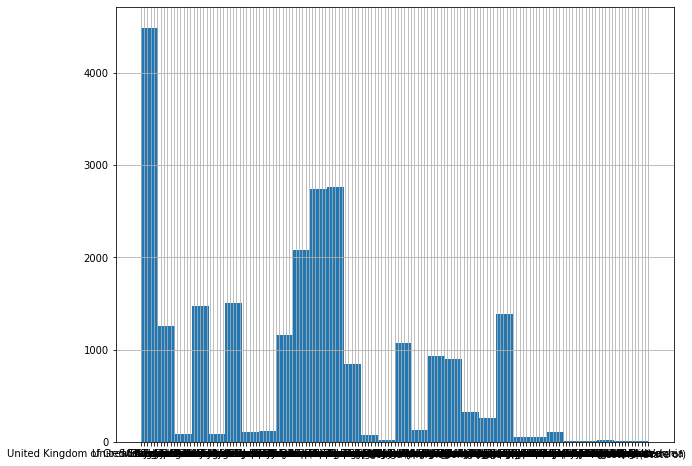

In [46]:
tutask_subset['country_of_residence'].hist(bins=30, figsize=(10,8))

In [47]:
tutask_subset.survey_type = tutask_subset.survey_type.astype('category')
print(tutask_subset.survey_type.dtype)

category


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [48]:
tutask_subset.country_of_residence = tutask_subset.country_of_residence.astype('category')
print(tutask_subset.country_of_residence.dtype)

category


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [49]:
tutask_subset.age = tutask_subset.age.astype('category')
print(tutask_subset.age.dtype)

category


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
